<a href="https://colab.research.google.com/github/MiguelSanz2/APRENDIZAJE_AUTOMATICO_23_24/blob/main/practica4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grupo 07

Miguel Sanz Almau

Carlos Ricardo Adaro Miro

Juan Rivera Sanchez
# PRACTICA 4:

EJERCICIO 1:

In [ ]:
import random
import math
import numpy as np
!pip install deap
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.7 MB/s eta 0:00:00


### PASO 1
Definición de la función de picos: En esta sección, se define la función de picos que queremos optimizar. La función de picos toma dos parámetros, x e y, y devuelve un valor que representa la altura de la función en esas coordenadas.

In [ ]:
def picos(x, y):
    return 3 * ((1 - x)**2) * np.exp(-(x**2) - (y + 1)**2) - 10 * ((x / 5) - x**3 - y**5) * np.exp(-(x**2) - y**2) - (1 / 3) * np.exp(-((x + 1)**2) - y**2)

### Paso 2
Creación de los objetos para definir el problema y el tipo de individuo: En esta sección, se crean los objetos necesarios para definir el problema y el tipo de individuo que utilizaremos en los algoritmos genéticos. Se define un objeto de aptitud (FitnessMax) que representa la aptitud de un individuo y un objeto de individuo (Individual) que representa un individuo en sí.


In [ ]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

### Paso 3
Definición de la función objetivo: En esta sección, se define la función objetivo que utilizaremos para evaluar la aptitud de los individuos. La función objetivo toma un individuo como parámetro y devuelve su aptitud. Si un individuo está fuera de los límites definidos (-100 <= x <= 100 y -100 <= y <= 100), se le asigna una aptitud negativa para penalizarlo.


In [ ]:
def funcion_objetivo(individual):
    """
    Objective function for our problem
    """
    x, y = individual
    if not (-100 <= x <= 100) or not (-100 <= y <= 100):
        return -1,  # Penalize individuals outside the bounds
    return picos(x, y),

### Paso 4
Restricciones del dominio: En esta sección, se definen las restricciones del dominio para los valores de x e y. En nuestro caso, los valores de x e y deben estar entre -50 y 50.


In [ ]:
BOUND_LOW, BOUND_UP = -50, 50

### Paso 5
Registro de operaciones genéticas: En esta sección, se registran las operaciones genéticas que utilizaremos en los algoritmos genéticos. Se registran las operaciones de generación de genes, generación de individuos y población, evaluación de la función objetivo, cruce, mutación y selección.

In [ ]:
toolbox = base.Toolbox()

# Generamos genes
toolbox.register("attr_uniform", random.uniform, BOUND_LOW, BOUND_UP)

# Generamos individuos y poblacion
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 30)

# Register genetic operations
toolbox.register("evaluate", funcion_objetivo)
toolbox.register("mate", tools.cxBlend, alpha=0.5)  # Blend crossover
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=5, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

### Paso 6
Función de trazado de la evolución: En esta sección, se define una función para trazar la evolución del mejor individuo en cada generación. La función toma un registro de la evolución como parámetro y guarda un gráfico de la evolución en un archivo.

In [ ]:
def plot_evolucion(log, filename="Convergencia.eps"):
    """
    Plot the evolution of the best individual in each generation
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    ax1.fill_between(gen, fit_mins, fit_maxs, where=np.array(fit_maxs) >= np.array(fit_mins), facecolor='g', alpha=0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-10, 20])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig(filename, dpi=300)

### Paso 7
Función principal: En esta sección, se define la función principal que ejecuta los algoritmos genéticos para optimizar la función de picos. Se inicializa una población, se define un objeto de Salón de la Fama (HallOfFame) para almacenar el mejor individuo, se definen estadísticas para el registro de la evolución y se ejecutan los algoritmos genéticos utilizando la función eaMuCommaLambda de DEAP. Finalmente, se devuelve el mejor individuo y el registro de la evolución.

In [ ]:
def main():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.7, 0.2, 30  # Adjusted parameters
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaMuCommaLambda(pop, toolbox, mu=30, lambda_=100, cxpb=CXPB,
                                              mutpb=MUTPB, ngen=NGEN, stats=stats,
                                              halloffame=hof, verbose=True)
    return hof, logbook

### Paso 8
Ejecución del programa: En esta sección, se ejecuta la función principal y se imprime el mejor individuo y su aptitud. También se llama a la función de trazado de la evolución para guardar un gráfico de la evolución en un archivo.

gen	nevals	avg         	std        	min         	max         
0  	30    	-2.11245e-68	1.13759e-67	-6.33735e-67	2.39023e-102
1  	90    	2.22909e-108	1.2004e-107	0           	6.68727e-107
2  	93    	1.81815e-59 	9.79106e-59	0           	5.45446e-58 
3  	91    	1.81815e-59 	9.79106e-59	0           	5.45446e-58 
4  	92    	4.41519e-43 	2.37765e-42	0           	1.32456e-41 
5  	88    	3.74371e-66 	2.01605e-65	0           	1.12311e-64 
6  	92    	3.39277e-21 	1.82706e-20	8.30191e-198	1.01783e-19 
7  	91    	0.0501779   	0.269793   	2.24342e-114	1.50306     
8  	97    	7.59895e-05 	0.000409206	8.45763e-71 	0.00227963  
9  	90    	0.000652006 	0.00311478 	6.1732e-51  	0.0172804   
10 	90    	0.00126309  	0.00315286 	7.40778e-29 	0.0118582   
11 	87    	0.0447741   	0.227485   	-1.24367e-11	1.26963     
12 	92    	0.0912473   	0.210561   	-9.54743e-31	0.700147    
13 	85    	0.152917    	0.250597   	6.51553e-07 	0.700147    
14 	86    	0.789363    	1.22692    	6.51553e-07 	3.68189     
15 	90  

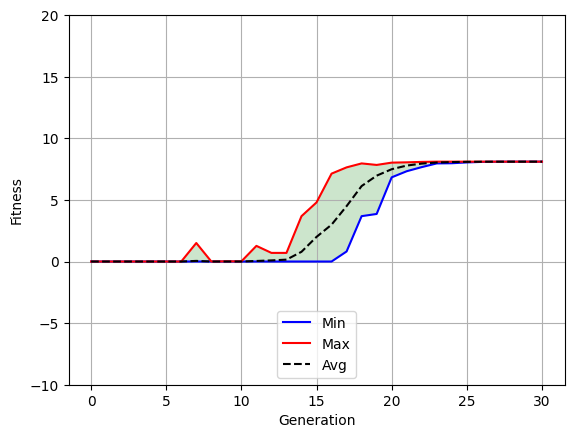

In [ ]:
if __name__ == "__main__":
    best, log = main()
    print("Best fitness: %f" % best[0].fitness.values)
    print("Best individual: %s" % best[0])
    plot_evolucion(log, "Convergencia.eps")

Por último, la gráfica muestra la evolución del fitness del mejor individuo de cada generación en un algoritmo evolutivo para encontrar los puntos máximos de la función picos. El fitness es una medida de la calidad de la solución representada por el individuo. En este caso, el fitness es el valor de la función picos en las coordenadas (x, y) del individuo.

La gráfica muestra que el fitness del mejor individuo aumenta rápidamente en las primeras generaciones. Esto se debe a que el algoritmo comienza con una población de individuos aleatorios, y algunos de estos individuos tienen un fitness relativamente alto. El algoritmo luego selecciona estos individuos para reproducirse, lo que ayuda a que el fitness promedio de la población aumente.

En las generaciones posteriores, el fitness del mejor individuo aumenta más lentamente. Esto se debe a que la población se vuelve más homogénea, y es más difícil encontrar individuos con un fitness significativamente mayor que el promedio.

La gráfica muestra que el algoritmo alcanza un fitness máximo de 8.106207 en la generación 30. Esto significa que el algoritmo encontró una solución que maximiza la función picos.

La gráfica se puede interpretar como sigue:

- En las primeras generaciones: El algoritmo está explorando el espacio de soluciones. Selecciona individuos con un fitness relativamente alto y los usa para crear nuevos individuos.
- En las generaciones posteriores: El algoritmo está refinando la solución. Selecciona individuos con un fitness más alto y los usa para crear nuevos individuos.
La gráfica muestra que el algoritmo es capaz de encontrar una solución buena al problema de encontrar los puntos máximos de la función picos, incluso aunque la función es compleja.

# Conceptos clave
- Individuo: Un individuo es una solución potencial al problema que estamos tratando de resolver. En nuestro caso, un individuo será una combinación de dos valores, x e y, que representan las coordenadas en el plano.

- Población: Una población es un conjunto de individuos. En cada generación, los individuos se reproducen y evolucionan para encontrar soluciones óptimas.

- Función objetivo: La función objetivo es la función que queremos maximizar o minimizar. En nuestro caso, la función objetivo es la función de picos.

- Cruce: El cruce es el proceso de combinar los genes de dos individuos para crear nuevos individuos. En nuestro caso, utilizaremos el cruce de mezcla (blend crossover) para combinar los valores de x e y de dos individuos.

- Mutación: La mutación es el proceso de introducir cambios aleatorios en los genes de un individuo. En nuestro caso, utilizaremos la mutación gaussiana para cambiar ligeramente los valores de x e y de un individuo.

- Selección: La selección es el proceso de elegir los individuos más aptos para reproducirse y formar la siguiente generación. En nuestro caso, utilizaremos el torneo de selección (tournament selection) para seleccionar los individuos más aptos.

# Ejercicio 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

###Paso 1:

Función de Rastrigin: La función de Rastrigin es una función matemática utilizada para evaluar el rendimiento de los algoritmos de optimización. Está definida en un espacio de búsqueda multidimensional y tiene múltiples mínimos locales. La función de Rastrigin se define de la siguiente manera:

In [ ]:
def rastrigin(x):
    A = 10
    n = len(x)
    return A * n + sum([(xi ** 2 - A * np.cos(2 * np.pi * xi)) for xi in x])

###Paso 2:

Función de inicialización de población: Esta función inicializa una población de tamaño pop_size con individuos que tienen n variables de decisión. Los valores de las variables de decisión se generan aleatoriamente en el rango [-5.12, 5.12].

In [ ]:
def initialize_population(pop_size, n):
    return [np.random.uniform(-5.12, 5.12, n) for _ in range(pop_size)]


###Paso 3:
Función de selección de padres por torneo: Esta función selecciona los padres para la reproducción utilizando el método del torneo. Se eligen k individuos al azar de la población y se selecciona el individuo con el mejor puntaje de aptitud.

In [ ]:
def select_parents(population, fitness_scores, k=3):
    selected_parents = []
    for _ in range(len(population)):
        chosen = np.random.choice(len(population), k, replace=False)
        selected = min(chosen, key=lambda x: fitness_scores[x])
        selected_parents.append(population[selected])
    return selected_parents

###Paso 4:
Función de cruce con un punto: Esta función realiza el cruce de un punto entre dos padres. Se elige un punto de cruce aleatorio y se intercambian las partes de los padres a ambos lados del punto de cruce para crear dos hijos.

In [ ]:
def crossover_onepoint(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1) - 1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2


###Paso 5:

Función de cruce con dos puntos: Esta función realiza el cruce de dos puntos entre dos padres. Se eligen dos puntos de cruce aleatorios y se intercambian las partes de los padres entre los puntos de cruce para crear dos hijos.

In [ ]:
def crossover_twopoints(parent1, parent2):
    crossover_points = sorted(np.random.choice(range(1, len(parent1)), 2, replace=False))
    child1 = np.concatenate((parent1[:crossover_points[0]], parent2[crossover_points[0]:crossover_points[1]], parent1[crossover_points[1]:]))
    child2 = np.concatenate((parent2[:crossover_points[0]], parent1[crossover_points[0]:crossover_points[1]], parent2[crossover_points[1]:]))
    return child1, child2

###Paso 6:

Función de mutación: Esta función realiza la mutación de un individuo. Para cada variable de decisión en el individuo, se genera un número aleatorio y si es menor que la tasa de mutación, se reemplaza el valor de la variable de decisión por uno nuevo generado aleatoriamente en el rango [-5.12, 5.12].

In [ ]:
def mutate(individual, mutation_rate):
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] = np.random.uniform(-5.12, 5.12)
    return individual

###Paso 8:

Función de evaluación de la población: Esta función evalúa la aptitud de cada individuo en la población utilizando la función de Rastrigin.

In [ ]:
def evaluate_population(population):
    return [rastrigin(individual) for individual in population]


###Paso 9:

 Algoritmo genético: Esta función implementa el algoritmo genético completo. Genera una población inicial, evalúa la aptitud de los individuos, selecciona los padres, realiza el cruce y la mutación, y repite este proceso durante un número determinado de generaciones. Devuelve el mejor individuo encontrado y su valor de aptitud, así como una lista de los valores mínimos encontrados en cada generación.

In [ ]:
def genetic_algorithm(pop_size, n, generations, crossover_func):
    population = initialize_population(pop_size, n)
    mutation_rate = 0.1

    # Lista para almacenar los valores mínimos encontrados en cada generación
    min_values_history = []

    for gen in range(generations):
        fitness_scores = evaluate_population(population)
        parents = select_parents(population, fitness_scores)
        offspring = []

        for i in range(0, len(parents), 2):
            child1, child2 = crossover_func(parents[i], parents[i + 1])
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            offspring.extend([child1, child2])

        population = offspring

        # Guarda el valor mínimo encontrado en cada generación
        min_values_history.append(min(evaluate_population(offspring)))

    best_individual = min(population, key=lambda x: rastrigin(x))
    return best_individual, rastrigin(best_individual), min_values_history

###Paso 10:

Vamos ha ejecutar el algoritmo genético con una población de tamaño 50, 10 variables de decisión y 100 generaciones. Se utiliza el cruce de un punto y el cruce de dos puntos como funciones de cruce. Los resultados se imprimen en la consola, mostrando el mejor individuo encontrado y su valor mínimo.

Mejor individuo (cruce con un punto): [-3.14203788e-02  1.00155925e+00 -9.60009107e-01  9.36017507e-01
 -9.82381881e-01  1.04788433e+00 -5.86344653e-03  4.36479900e-04
 -9.42927821e-01 -1.07465365e+00]
Valor mínimo encontrado (cruce con un punto): 10.44841361419384
Mejor individuo (cruce con dos puntos): [-0.96517998 -0.95164123  0.00120358 -0.02994303  0.02716567  0.95920153
  0.04280075  0.06925622  0.87086015  1.03193239]
Valor mínimo encontrado (cruce con dos puntos): 10.541274863924983


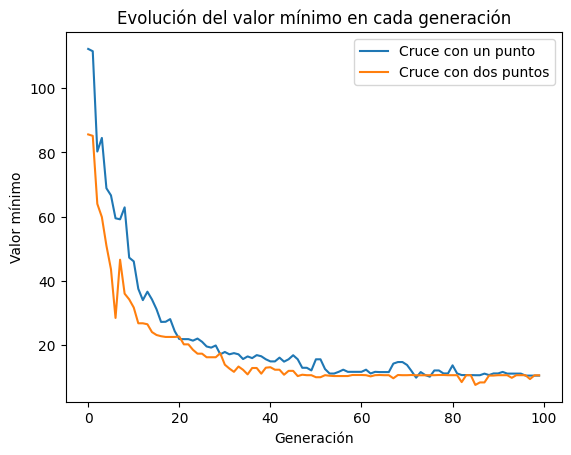

In [ ]:
# Número de generaciones
generations = 100

# Ejecución del algoritmo genético con cruce de un punto
best_individual_onepoint, min_value_onepoint, min_values_onepoint_history = genetic_algorithm(pop_size=50, n=10, generations=generations, crossover_func=crossover_onepoint)
print("Mejor individuo (cruce con un punto):", best_individual_onepoint)
print("Valor mínimo encontrado (cruce con un punto):", min_value_onepoint)

# Ejecución del algoritmo genético con cruce de dos puntos
best_individual_twopoints, min_value_twopoints, min_values_twopoints_history = genetic_algorithm(pop_size=50, n=10, generations=generations, crossover_func=crossover_twopoints)
print("Mejor individuo (cruce con dos puntos):", best_individual_twopoints)
print("Valor mínimo encontrado (cruce con dos puntos):", min_value_twopoints)

# Grafica los valores mínimos encontrados en cada generación
plt.plot(min_values_onepoint_history, label='Cruce con un punto')
plt.plot(min_values_twopoints_history, label='Cruce con dos puntos')
plt.xlabel('Generación')
plt.ylabel('Valor mínimo')
plt.legend()
plt.title('Evolución del valor mínimo en cada generación')
plt.show()

La gráfica muestra la evolución del valor mínimo de la función de Rastrigin para n = 10, para dos algoritmos genéticos (AG) con diferentes operadores de cruce: cruce con un punto (SP) y cruce con dos puntos (TP).

En ambos casos, el AG logra encontrar el valor mínimo global de la función, que es 0. Sin embargo, el AG con cruce con dos puntos (TP) converge más rápido que el AG con cruce con un punto (SP).

Esto se puede explicar por la naturaleza de los operadores de cruce. El cruce con un punto (SP) selecciona un punto aleatorio en la cadena de dos individuos y luego intercambia los genes a cada lado del punto. Esto puede conducir a la pérdida de información, ya que los genes de un individuo pueden ser reemplazados por los genes de otro individuo.

El cruce con dos puntos (TP) selecciona dos puntos aleatorios en la cadena de dos individuos y luego intercambia los genes entre los dos puntos. Esto conserva más información que el cruce con un punto, ya que los genes de un individuo no son reemplazados por los genes de otro individuo.

En este caso, el cruce con dos puntos (TP) conserva suficiente información para que el AG encuentre el valor mínimo global de la función de Rastrigin más rápido que el cruce con un punto (SP).

Análisis de los datos:

Los datos muestran que el AG con cruce con dos puntos (TP) tiene un mejor rendimiento que el AG con cruce con un punto (SP).

